## Phishing Tree
In this assignment I will produce a decision tree that will predict if a website is a phishing scam or not.

Confusion matrix: 
 [[ 840  148]
 [  25 1198]]

Classification report: 
               precision    recall  f1-score   support

          -1       0.97      0.85      0.91       988
           1       0.89      0.98      0.93      1223

   micro avg       0.92      0.92      0.92      2211
   macro avg       0.93      0.91      0.92      2211
weighted avg       0.93      0.92      0.92      2211



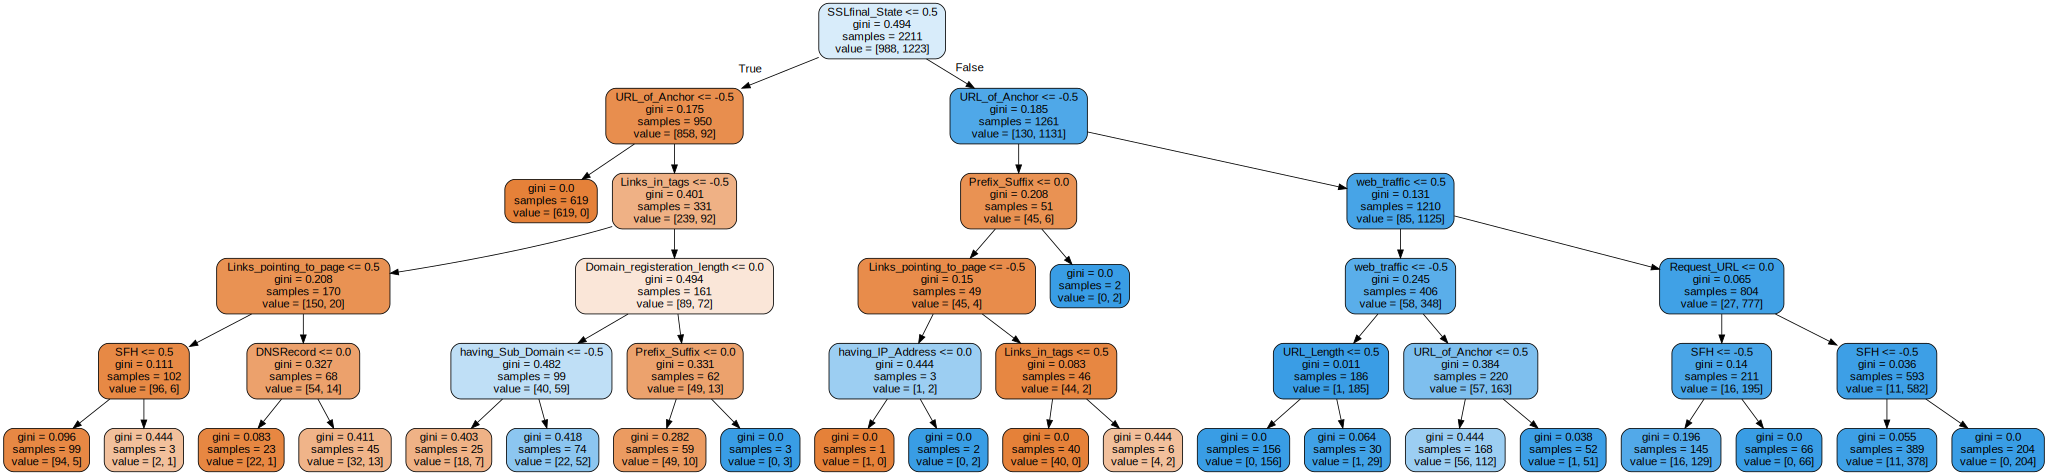

In [10]:
#Imports
import pandas as pd
from sklearn import tree
import graphviz

#Loading the phishing data
fp = "C:/Users/ottoj_000/Desktop/fishing.csv"
df = pd.read_csv(fp, sep=';')

#Setting the datasets, one with the "answers" and one without
X = df.drop('Result', axis=1)  
Y = df['Result']

#Splitting training and testing sets
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20) 

#Calculating
depth = 5
clf = tree.DecisionTreeClassifier(max_depth=depth)
clf = clf.fit(X_train, Y_train)

#How accurate is this? A confusion matrix will tell us!
#First we make a prediction
Y_pred = clf.predict(X_test)
#Then we make the matrix
from sklearn.metrics import classification_report, confusion_matrix  
print("Confusion matrix: \n",confusion_matrix(Y_test, Y_pred))
print("\nClassification report: \n", classification_report(Y_test, Y_pred))

#Visualising with graphviz
#Setting clf back to test
clf = clf.fit(X_test, Y_test)
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, feature_names=X.columns)
graph = graphviz.Source(dot_data)
graph

As we see from the confusion matrix and the classification report under it, the current tree is about 93% accurate. This means the decision tree assigns 93% percent of the samples correctly.  

The way you read this tree is as follows. Is the sites SSLfinal_Status below or at 0,5? If so, you move left and down on the tree, and ask yourself again, is the sites URL_of_anchor value less or at 0,5? If so, your chosen site lands down and left again, into a reddish brown block where all samples are deemed to be not phishing sites. Congrats. So basically, you go through it, checking if your sites data matches with the argument given or not, and move downwards left if it matches the argument, or down right if it doesn't. Eventually you'll land into a block that is either blue or red, where blue means your site is likely a phishing site, and red means it's likely not.